In [94]:
import json
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

In [95]:
confidence = 0.8
time_offset = 0.0

In [96]:
# load the data json with info about audio occurences
data_json = '../frames/complete.json'
data_info = json.load(open(data_json)) 
# print(data_info.keys())

games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']

frames = data_info['mspacman_JE5W3X5P3T_1'].keys()
print(len(frames))

audio_det = []
reward = []
conf = []
frame_num = []
# for demo_id in data_info.keys():
for i in frames:
    audio_det.append(data_info['mspacman_JE5W3X5P3T_1'][i]['audio'])
    reward.append(data_info['mspacman_JE5W3X5P3T_1'][i]['reward'])
    conf.append(data_info['mspacman_JE5W3X5P3T_1'][i]['confidence'])
    frame_num.append(data_info['mspacman_JE5W3X5P3T_1'][i]['frame_num'])
    
# print(reward)
# print(audio_det)

4433


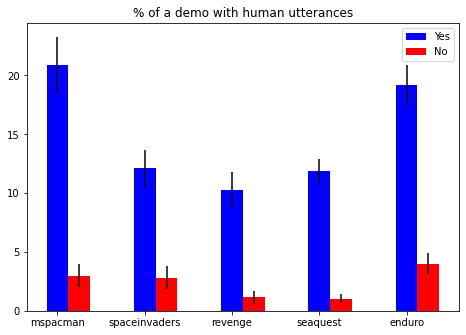

In [97]:
# what percentage of frames contain audio utterances
yes_count, no_count, frame_count = {}, {}, {}
for game in games:
    yes_count[game], no_count[game], frame_count[game] = {}, {}, {}
    for demo_id in data_info.keys():
        if game in demo_id:
            yes_count[game][demo_id], no_count[game][demo_id], frame_count[game][demo_id] = 0,0,0
            frames = data_info[demo_id].keys()
            frame_count[game][demo_id] += len(frames)
            for i in frames:
                if data_info[demo_id][i]['audio']=='yes' and data_info[demo_id][i]['confidence']>=confidence:
                    yes_count[game][demo_id]+=1
                elif data_info[demo_id][i]['audio']=='no' and data_info[demo_id][i]['confidence']>=confidence:
                    no_count[game][demo_id]+=1
                    
mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean([yes_count[game][id]*100.0/frame_count[game][id] for id in yes_count[game].keys()])
    std_yes[game] = np.std([yes_count[game][id]*100.0/frame_count[game][id] for id in yes_count[game].keys()])/np.sqrt(len(yes_count[game].keys()))
    
    mean_no[game] = np.mean([no_count[game][id]*100.0/frame_count[game][id] for id in no_count[game].keys()])
    std_no[game] = np.std([no_count[game][id]*100.0/frame_count[game][id] for id in no_count[game].keys()])/np.sqrt(len(no_count[game].keys()))
    

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(5)

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('% of a demo with human utterances')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audi

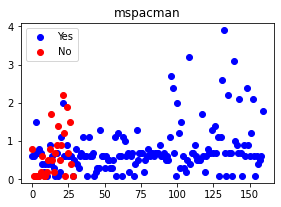

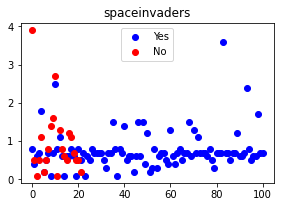

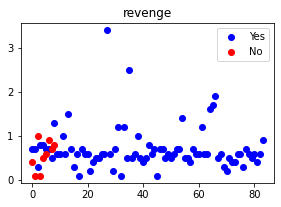

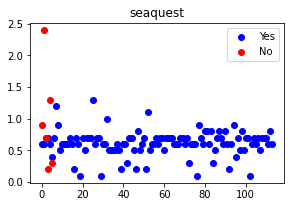

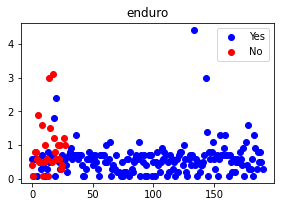

In [87]:
# distribution of utterance times for yes and no per game
# scatter plot
games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']

wav_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/human_audio/'
audio_annotation_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/annotations/'

yes_dur, no_dur = {}, {}

# loop through games
for game in games:
    yes_dur[game], no_dur[game] = [], []
    
    game_wav_path = os.path.join(wav_path,game)
    game_ann_path = os.path.join(audio_annotation_path,game)
    
    demo_wavs = os.listdir(game_wav_path)
    demo_anns = os.listdir(game_ann_path)
    
    demo_wavs = [os.path.join(game_wav_path,d) for d in demo_wavs]
    demo_anns = [os.path.join(game_ann_path,d) for d in demo_anns]
    
    demo_wavs.sort()
    demo_anns.sort()
    
    # loop through demos for a game
    for wav,ann in zip(demo_wavs,demo_anns):
        y, sr = librosa.load(wav)
#         print(y.shape)
        total_dur = librosa.get_duration(y=y, sr=sr)

        num_frames = y.shape[0]
        frame_rate = float(num_frames)/total_dur
        
        annotations = json.load(open(ann, "r"))
        
        # loop through utterances
        for key in annotations.keys():
            start = annotations[key][0]
            end   = annotations[key][1]
            word  = annotations[key][2]
            conf = annotations[key][3]
            
            dur = end-start
            
            if word=='yes' and dur>0 and conf>=confidence:
                yes_dur[game].append(dur)
            elif word=='no' and dur>0 and conf>=confidence:
                no_dur[game].append(dur)
                

# plot durations per game
# fig, ax = plt.subplots(3, 2)

i=0
for game in games:
    i+=1
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,2,i)
    
    ax.scatter(np.arange(len(yes_dur[game])),yes_dur[game], color='b')
    ax.scatter(np.arange(len(no_dur[game])),no_dur[game], color='r')
    ax.legend(labels=['Yes', 'No'])
    ax.set_title(game)

    plt.show()


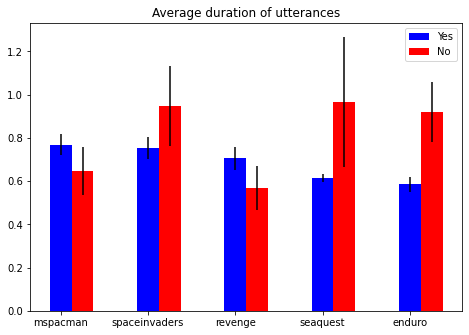

In [106]:
# plot mean and std of yes/no durations per game as a bar graph
mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean(yes_dur[game]) 
    std_yes[game] = np.std(yes_dur[game])/np.sqrt(len(yes_dur[game]))
    
    mean_no[game] = np.mean(no_dur[game])
    std_no[game] = np.std(no_dur[game])/np.sqrt(len(no_dur[game]))
    

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(5)

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('Average duration of utterances')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

['mspacman', 'spaceinvaders', 'revenge', 'seaquest']
{'mspacman': 0.5366876310272537, 'spaceinvaders': 0.1615881809787627, 'revenge': 0.08841732979664015, 'seaquest': 0.34961567071658817}
{'mspacman': 0.3313840155945419, 'spaceinvaders': 0.03418803418803419, 'revenge': 0.0, 'seaquest': 0.12658227848101267}


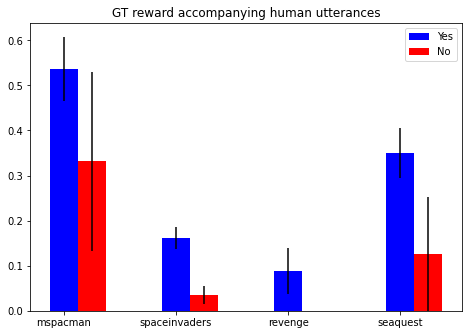

In [107]:
# what is the average reward/return around yes utterances and no utterances

games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest']

yes_reward, no_reward = {}, {}
for game in games:
    yes_reward[game], no_reward[game] = [], []
    for demo_id in data_info.keys():
        if game in demo_id:
            
            frames = data_info[demo_id].keys()
            for i in frames:
                if data_info[demo_id][i]['audio']=='yes' and data_info[demo_id][i]['confidence']>=confidence:
                    yes_reward[game].append(data_info[demo_id][i]['reward'])
                elif data_info[demo_id][i]['audio']=='no' and data_info[demo_id][i]['confidence']>=confidence:
                    no_reward[game].append(data_info[demo_id][i]['reward'])
                    
mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean(yes_reward[game])
    std_yes[game] = np.std(yes_reward[game])/np.sqrt(len(yes_reward[game]))
    
    mean_no[game] = np.mean(no_reward[game])
    std_no[game] = np.std(no_reward[game])/np.sqrt(len(no_reward[game]))
    
print(games)
print(mean_yes)
print(mean_no)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(games))

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('GT reward accompanying human utterances per time step ')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

# TODO compare with robotaxi analysis (jupyter notebook)

/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audi

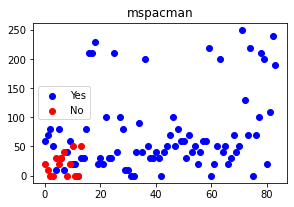

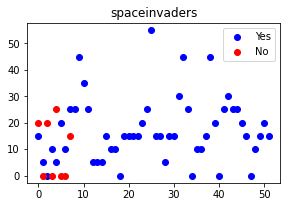

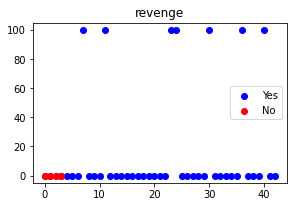

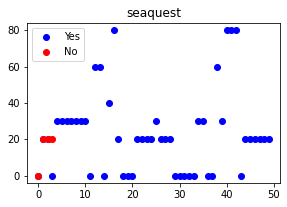

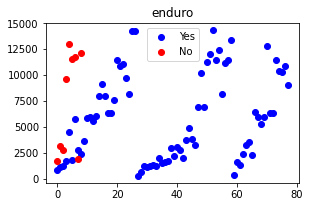

In [105]:
# what is the corresponding reward/return around yes utterance snippets and no utterance snippets
# test speech to text confidence
# test timing of demo duration before and after utterance chunk
# scatter plot
confidence = 0.85
left_offset, right_offset = 1.00, 0.00
games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']

wav_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/human_audio/'
audio_annotation_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/annotations/'

yes_rew, no_rew = {}, {}
filter_energy = True

# loop through games
for game in games:
    yes_rew[game], no_rew[game] = [], []
    
    game_wav_path = os.path.join(wav_path,game)
    game_ann_path = os.path.join(audio_annotation_path,game)
    
    demo_wavs = os.listdir(game_wav_path)
    demo_anns = os.listdir(game_ann_path)
    
    demo_wavs = [os.path.join(game_wav_path,d) for d in demo_wavs]
    demo_anns = [os.path.join(game_ann_path,d) for d in demo_anns]
    
    demo_wavs.sort()
    demo_anns.sort()
    
    # loop through demos for a game
    for wav,ann in zip(demo_wavs,demo_anns):
        demo_id = wav.split('/')[-1][:-4]
        game_demo_id = list(data_info.keys())
        for g in game_demo_id:
            if game in g and g.endswith('_'+str(demo_id)):
                k = g
#                 print(k)
                break
        
        y, sr = librosa.load(wav)
#         print(y.shape)
        total_dur = librosa.get_duration(y=y, sr=sr)
        total_sum_energy = np.sum(y)
        total_mean_energy = np.mean(y)

        num_audio_frames = y.shape[0]
        frame_rate = float(frame_count[game][k])/total_dur
        
        annotations = json.load(open(ann, "r"))
        
        # loop through utterances
        for key in annotations.keys():
            start = annotations[key][0]
            end   = annotations[key][1]
            word  = annotations[key][2]
            conf = annotations[key][3]
            
            dur = end-start
#             print(start,end,frame_rate)
            
#             print(game,key)
            stop_frame = min(int(frame_rate*(end+right_offset)),frame_count[game][k])
            start_frame = max(int(frame_rate*(start-left_offset)),0)
        
        
            s_proportion = (start-left_offset) / total_dur
            e_proportion = (end+right_offset) / total_dur
            s_index = int(num_audio_frames * s_proportion)
            e_index = int(num_audio_frames * e_proportion)
            audio_chunk = y[s_index:e_index]
            
            mean_energy = np.mean(audio_chunk)
            sum_energy = np.sum(audio_chunk)
        
#             print(game, k, start_frame,stop_frame,frame_count[game][k])
            
            # get cumulative sum of rewards for this snippet
            r = 0
            
            for i in range(start_frame,stop_frame):
                r+=data_info[k][str(i)]['reward']
            
            if word=='yes' and dur>0 and conf>=confidence:
                if filter_energy and mean_energy>total_mean_energy:
                    yes_rew[game].append(r)
                elif not filter_energy:
                    yes_rew[game].append(r)
                    
            elif word=='no' and dur>0 and conf>=confidence:
                if filter_energy and mean_energy>total_mean_energy:
                    no_rew[game].append(r)
                elif not filter_energy:
                    no_rew[game].append(r)
                


i=0
for game in games:
    i+=1
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,2,i)
    
    ax.scatter(np.arange(len(yes_rew[game])),yes_rew[game], color='b')
    ax.scatter(np.arange(len(no_rew[game])),no_rew[game], color='r')
    ax.legend(labels=['Yes', 'No'])
    ax.set_title(game)

    plt.show()

['mspacman', 'spaceinvaders', 'revenge', 'seaquest']
{'mspacman': 68.26923076923077, 'spaceinvaders': 20.61855670103093, 'revenge': 11.25, 'seaquest': 29.81981981981982}
{'mspacman': 23.703703703703702, 'spaceinvaders': 9.5, 'revenge': 0.0, 'seaquest': 15.0}


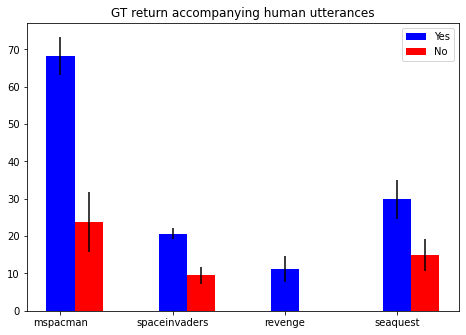

In [110]:
# plot average returns per utterance per game

games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest']

mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean(yes_rew[game])
    std_yes[game] = np.std(yes_rew[game])/np.sqrt(len(yes_rew[game]))
    
    mean_no[game] = np.mean(no_rew[game])
    std_no[game] = np.std(no_rew[game])/np.sqrt(len(no_rew[game]))
    
print(games)
print(mean_yes)
print(mean_no)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(games))

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('GT return accompanying human utterances')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

In [ ]:
# what is the corresponding energy of utterances and reward values

confidence = 0.85
left_offset, right_offset = 1.00, 0.00
games = ['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']

wav_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/human_audio/'
audio_annotation_path = '/Users/akanksha/Desktop/audio_atari/ICML2019-TREX-sahil/audio_atari/frames/annotations/'

yes_rew, no_rew = {}, {}
yes_mean_energy, no_mean_energy = {}, {}
yes_sum_energy, no_sum_energy = {}, {}


# loop through games
for game in games:
    yes_rew[game], no_rew[game] = [], []
    yes_mean_energy[game], no_mean_energy[game] = [], []
    yes_sum_energy[game], no_sum_energy[game] = [], []
    
    game_wav_path = os.path.join(wav_path,game)
    game_ann_path = os.path.join(audio_annotation_path,game)
    
    demo_wavs = os.listdir(game_wav_path)
    demo_anns = os.listdir(game_ann_path)
    
    demo_wavs = [os.path.join(game_wav_path,d) for d in demo_wavs]
    demo_anns = [os.path.join(game_ann_path,d) for d in demo_anns]
    
    demo_wavs.sort()
    demo_anns.sort()
    
    # loop through demos for a game
    for wav,ann in zip(demo_wavs,demo_anns):
        demo_id = wav.split('/')[-1][:-4]
        game_demo_id = list(data_info.keys())
        for g in game_demo_id:
            if game in g and g.endswith('_'+str(demo_id)):
                k = g
#                 print(k)
                break
        
        y, sr = librosa.load(wav)
#         print(y.shape)
        total_dur = librosa.get_duration(y=y, sr=sr)
        total_sum_energy = np.sum([e*e for e in y.tolist()])
        total_mean_energy = np.mean([e*e for e in y.tolist()])

        num_audio_frames = y.shape[0]
        frame_rate = float(frame_count[game][k])/total_dur
        
        annotations = json.load(open(ann, "r"))
        
        # loop through utterances
        for key in annotations.keys():
            start = annotations[key][0]
            end   = annotations[key][1]
            word  = annotations[key][2]
            conf = annotations[key][3]
            
            dur = end-start
#             print(start,end,frame_rate)
            
#             print(game,key)
            stop_frame = min(int(frame_rate*(end+right_offset)),frame_count[game][k])
            start_frame = max(int(frame_rate*(start-left_offset)),0)
        
        
            s_proportion = (start-left_offset) / total_dur
            e_proportion = (end+right_offset) / total_dur
            s_index = int(num_audio_frames * s_proportion)
            e_index = int(num_audio_frames * e_proportion)
            audio_chunk = y[s_index:e_index]
            
            mean_energy = np.mean([e*e for e in audio_chunk.tolist()])
            sum_energy = np.sum([e*e for e in audio_chunk.tolist()])
        
#             print(game, k, start_frame,stop_frame,frame_count[game][k])
            
            # get cumulative sum of rewards for this snippet
            r = 0
            
            for i in range(start_frame,stop_frame):
                r+=float(data_info[k][str(i)]['reward'])
            
            if word=='yes' and dur>0 and conf>=confidence:                
                yes_rew[game].append(r)
                yes_mean_energy[game].append(mean_energy)
                yes_sum_energy[game].append(sum_energy)
                    
            elif word=='no' and dur>0 and conf>=confidence:
                no_rew[game].append(r)
                no_mean_energy[game].append(mean_energy)
                no_sum_energy[game].append(sum_energy)
                
#         print(yes_mean_energy)
#         print(yes_reward)
                


i=0
for game in games:
    i+=1
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,2,i)
    
    ax.scatter(yes_mean_energy[game],yes_rew[game], color='b')
    ax.scatter(no_mean_energy[game],no_rew[game], color='r')
    ax.legend(labels=['Yes', 'No'])
    ax.set_title(game+' rewards and mean energy per utterance')

    plt.show()

/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/akanksha/anaconda3/envs/audio/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audi

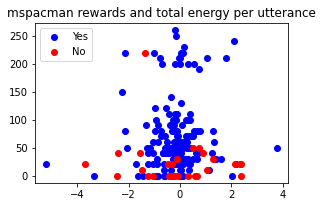

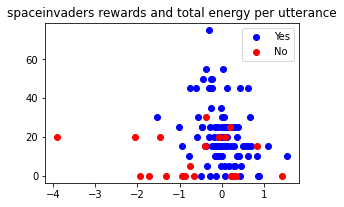

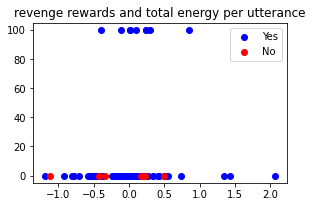

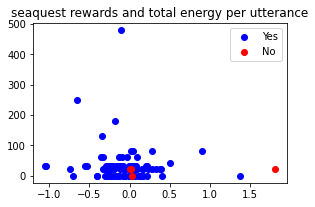

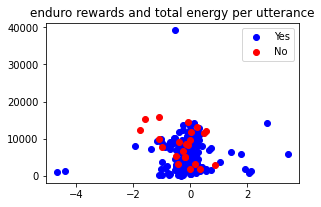

In [115]:
i=0
for game in games:
    i+=1
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(3,2,i)
    
    ax.scatter(yes_sum_energy[game],yes_rew[game], color='b')
    ax.scatter(no_sum_energy[game],no_rew[game], color='r')
    ax.legend(labels=['Yes', 'No'])
    ax.set_title(game+' rewards and total energy per utterance')

    plt.show()

['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']
{'mspacman': -3.6611955e-06, 'spaceinvaders': 2.9876387e-07, 'revenge': -1.2050649e-06, 'seaquest': -2.395663e-06, 'enduro': -3.5554335e-06}
{'mspacman': -5.7418715e-06, 'spaceinvaders': -2.0512733e-05, 'revenge': -2.733737e-06, 'seaquest': 1.7349832e-05, 'enduro': -4.664807e-06}


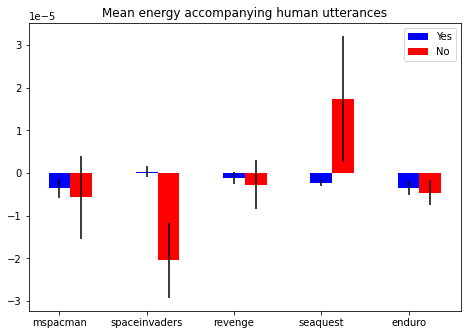

In [116]:
# Plot average energy for yes and no utterances

mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean(yes_mean_energy[game])
    std_yes[game] = np.std(yes_mean_energy[game])/np.sqrt(len(yes_mean_energy[game]))
    
    mean_no[game] = np.mean(no_mean_energy[game])
    std_no[game] = np.std(no_mean_energy[game])/np.sqrt(len(no_mean_energy[game]))
    
print(games)
print(mean_yes)
print(mean_no)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(games))

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('Mean energy accompanying human utterances')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

['mspacman', 'spaceinvaders', 'revenge', 'seaquest', 'enduro']
{'mspacman': -0.16962107, 'spaceinvaders': 0.01797147, 'revenge': -0.034367, 'seaquest': -0.08660311, 'enduro': -0.11574879}
{'mspacman': -0.066961445, 'spaceinvaders': -0.6553027, 'revenge': -0.10939027, 'seaquest': 0.46277654, 'enduro': -0.2676584}


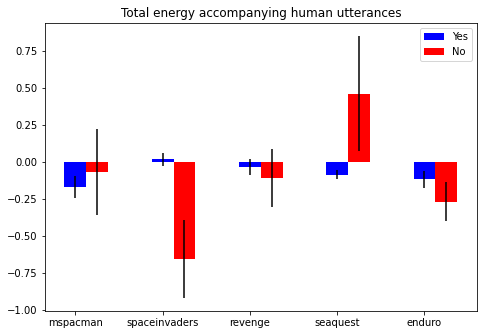

In [117]:
# Plot total energy for yes and no utterances

mean_yes, mean_no = {}, {}
std_yes, std_no = {}, {}
for game in games:
    mean_yes[game] = np.mean(yes_sum_energy[game])
    std_yes[game] = np.std(yes_sum_energy[game])/np.sqrt(len(yes_sum_energy[game]))
    
    mean_no[game] = np.mean(no_sum_energy[game])
    std_no[game] = np.std(no_sum_energy[game])/np.sqrt(len(no_sum_energy[game]))
    
print(games)
print(mean_yes)
print(mean_no)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(games))

ax.bar(X,[mean_yes[game] for game in games], yerr=[std_yes[game] for game in games], color = 'b', width = 0.25)
ax.bar(X+0.25,[mean_no[game] for game in games], yerr=[std_no[game] for game in games], color = 'r', width = 0.25)

# ax.set_ylabel('\% of a demo with human utterances')
ax.set_title('Total energy accompanying human utterances')
ax.set_xticks(X)
ax.set_xticklabels(games)
ax.legend(labels=['Yes', 'No'])

plt.show()

In [ ]:
# unpaired t-test between reward/cumulative sum of snippet rewards and energy values

# unpaired t-test between reward/cumulative sum of snippet rewards and label (yes/no)